# Regresion Lineal - Problemas con la regresión lineal

Resumen:
+ Modelos lineales con variables categóricas
+ Variables categóricas en una regresión lineal
+ Transformar las variables en relaciones no lineales
+ El problema de los outliers

In [1]:
from IPython.display import Image

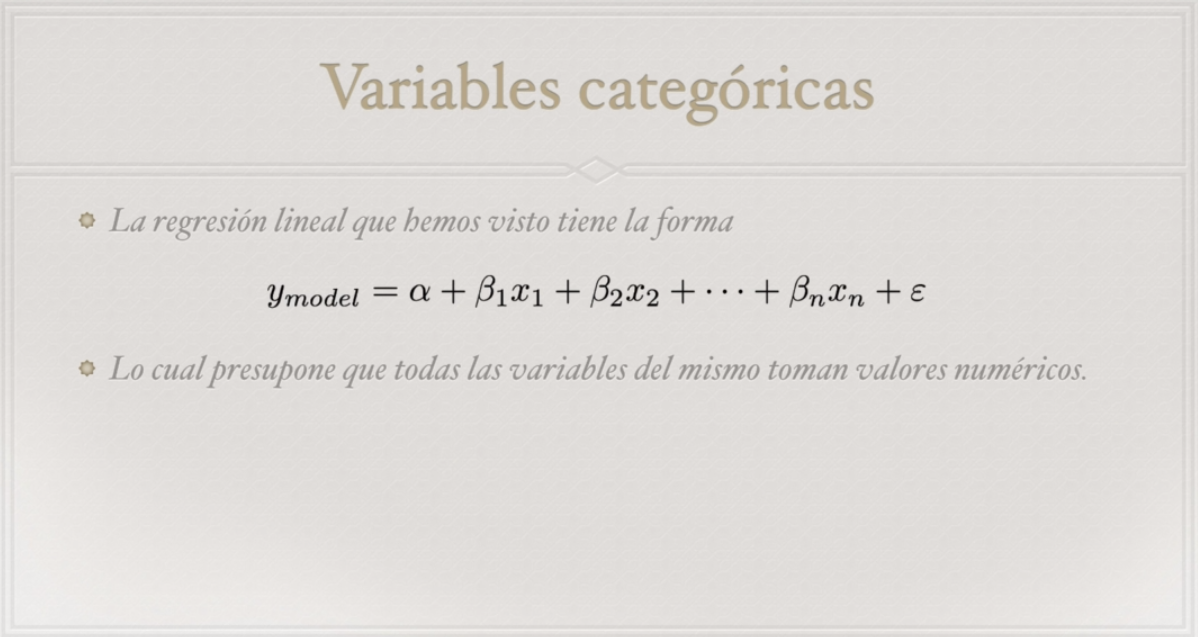

In [2]:
Image(filename="./images/v_categoricas_01.png")

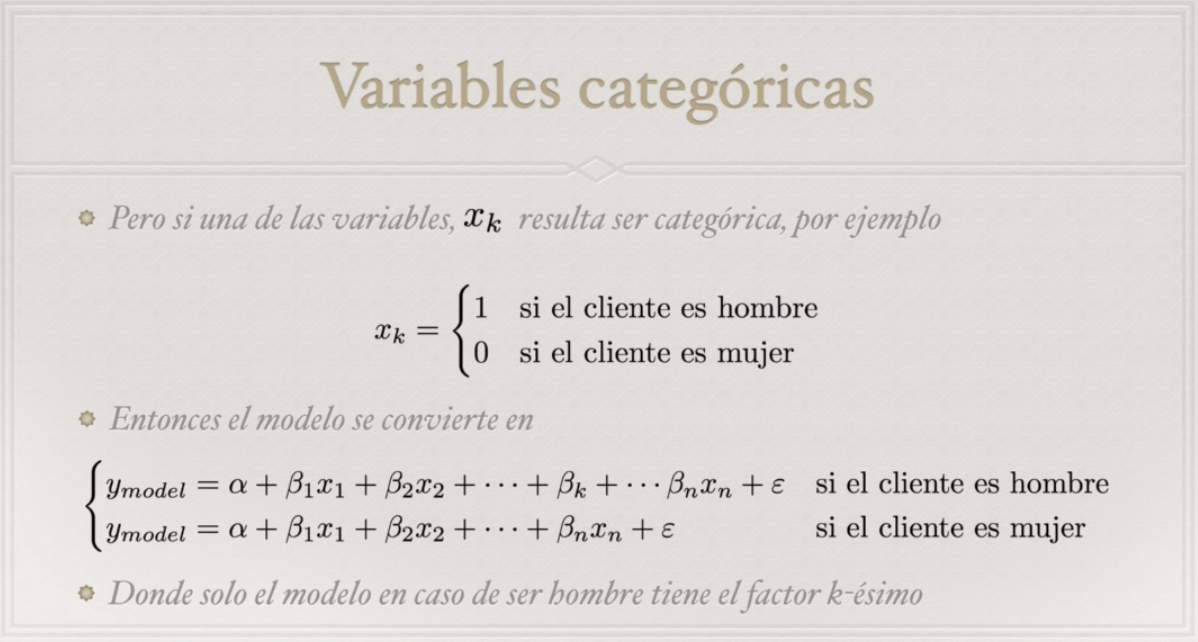

In [3]:
Image(filename="./images/v_categoricas_02.png")

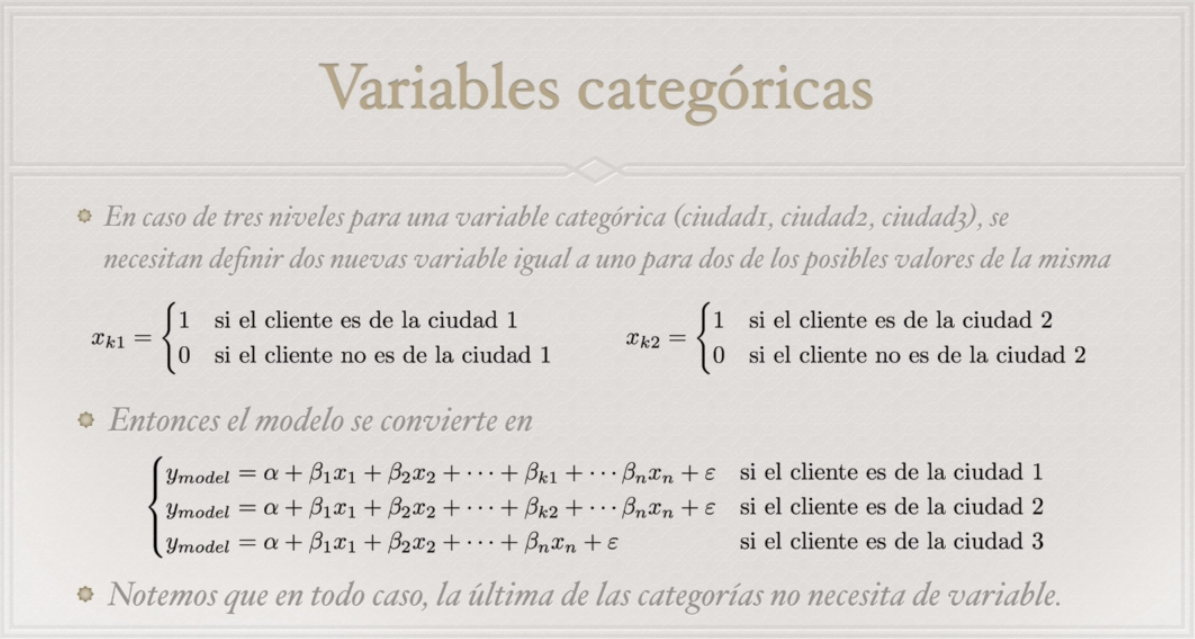

In [4]:
Image(filename="./images/v_categoricas_03.png")

## El tratamiento de las variables categóricas

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("./data/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Las columnas `Gender`y `City Tier` son variables categóricas, por lo que no podemos elaborar un modelo lineal con los valores que contienen. Así que vamos a crear dos variables dummys.

In [7]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [8]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [9]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


Ahora que ya tenemos las variables dummys vamos a añadirlas al df

In [10]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [11]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [12]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


Vamos a añadir estas variables al modelo y calcular sus coeficientes respectivos. Para ello nos sobrarían las columnas originales `Gender` y `City Tier`. Vamos a indicar qué variables predictoras queremos utilizar.

In [13]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [14]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [15]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [17]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.15494612549589393),
 ('Gender_Female', -131.02501325554675),
 ('Gender_Male', 131.02501325554664),
 ('City_Tier 1', 76.764326010495),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445645)]

In [18]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:

Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Gender_Female' -131.02501325554567 + 'Gender_Male' 131.0250132555456+'City_Tier 1' 76.76432601049527 + 'City_Tier 2' 55.138974309232474 + 'City_Tier 3' -131.9033003197278+'Record' 772.2334457445648
+ Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
+ Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 +'Record'* 772.2334457445648
+ Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
+ Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 'Record'* 772.2334457445648
+ Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 55.138974309232474 'Record'* 772.2334457445648
+ Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [19]:
-79.41713030137362 + 131.0250132555456 - 131.9033003197278

-80.29541736555583

In [20]:
df_new["prediction"] = lm.predict(df_new[feature_cols])

In [21]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [22]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.340816

In [23]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [24]:
sales_mean=np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [25]:
error = RSE/sales_mean
error

0.1303113568029416

## Transformación de variables para conseguir una relación no lineal

El segundo problema más típico que nos solemos encontrar cuando lleva a cabo una regresión lineal. La variable de salida, la que pretendemos predecir, no necesariamente tiene una relación directamente lineal con alguna de las variables predictoras. Puede haber relaciones no lineales. Este tipo de relaciones podrían ser cuadráticas, exponenciales, logarítmicas u otras más complejas como un polinomio de grado elevado. En estos casos conviene transformar la variable para ajustarnos a lo que queremos.

Lo primero para comprobar si se trata de una relación lineal o no es realizar un gráfico.

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
data_auto = pd.read_csv("./data/auto-mpg/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [28]:
data_auto.shape

(406, 9)

Text(0.5,1,'CV vs MPG')

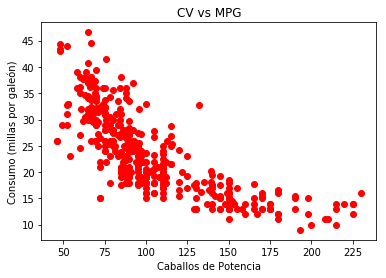

In [29]:
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

Vamos a probar primero con un modelo de regresión lineal

### Modelo de regresión lineal
mpg = a + b * horsepower

In [30]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [31]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

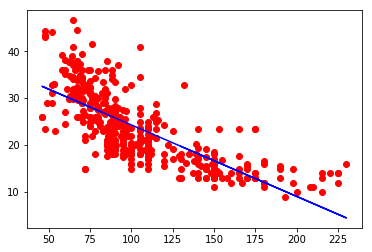

In [32]:
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [33]:
lm.score(X_data, Y)

0.5746533406450252

In [34]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

### Modelo de regresión cuadrático
mpg = a + b * horsepower^2

In [35]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [36]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
lm.score(X_data, Y)

0.4849887034823205

In [38]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

### Modelo de regresión lineal y cuadrático
mpg = a + b horsepower + c horsepower^2

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [40]:
# Polinomio de grado 2
poly = PolynomialFeatures(degree=2)

In [41]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [42]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lm.score(X_data, Y)

0.6439066584257469

In [44]:
lm.intercept_

55.026192447081144

In [45]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434 hp + 0.00112615 hp^2

In [46]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [47]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.6379546619069%
Regresión de grado 3
R2:0.6444678885560744
58.448774111485776
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.514572864321607, error: 19.622473106036686%
Regresión de grado 4
R2:0.6467674189704502
40.096643862778855
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.55891250126879%
Regresión de grado 5
R2:0.6547512491363356
-40.694029037178964
[ 0.00000000e+00  4.00021893e+00 -7.54802467e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388794579, RSE: 4.546921734127706, Y_mean: 23.514572864321607, error: 19.336612067602974%
Regresión de grado 6
R2:0.6572723767653661
-156.969851178

Parece que de todos los modelos el que mejor precide el consumo sería el polinomio de **Grado 2**

## El problema de los outliers

Los outliers son aquellos valores que se apartan de lo normal. Conviene tratarlos para que no distorsionen en exceso el modelo. Conviene crear el modelo con ellos y luego crearlo de nuevo sin los outliers y compararíamos ambos.

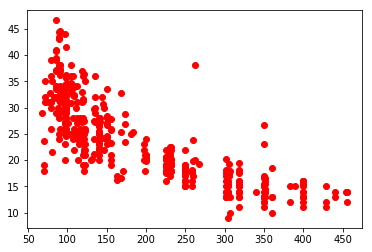

In [48]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [49]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
lm.score(X,Y)

0.6261049762826918

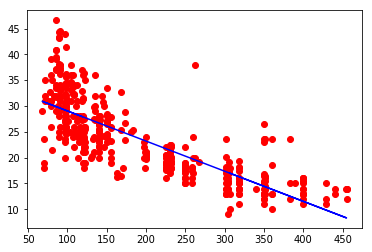

In [51]:
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [52]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [53]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [54]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [55]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
lm.score(X,Y)

0.6466514317531822

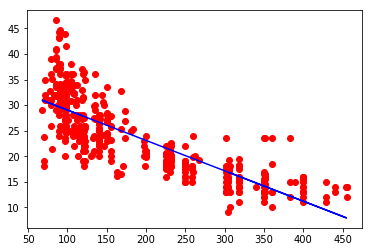

In [57]:
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")